# Titanic Survivor Prediction Analysis

The famous disaster of the HMS Titanic is one of the most iconic moments of the 20th century. Most of the passengers passed away in the shipwreck, very few being able to get away. Along with this notebook file is a .csv file which includes the entire list of the names of the passengers onboard, along with a lot of their details. My job is to create a model that will successfully predict whether a passenger will have survived or not based on their attributes. Before that, we'll analyze the atrributes to see how they affect the survival rate of the passengers using libraries such as Pandas and using graphical representations using libraries like Matplotlib and Seaborn.

## Import dataset

First we'll import Pandas and NumPy into our notebook file and then open our dataset. We'll save that into a dataframe. We'll then print the five rows of the dataframe to see whether it's loaded properly or not.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv', sep=';')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


Next, we'll check the shape of the dataframe to see the number of passengers and also check to see whether all the remaining columns have any NaN values or not.

In [2]:
print(df.shape)
df.count()

(891, 12)


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

As we can see, there are a total of 891 rows meaning there are 891 passengers who's data is available to us. Also, checking the number of values for each of the columns shows that there are missing values for the columns "Age", "Cabin" and "Embarked", which can be taken into consideration when building models.

## Analyze dataset

Now it's time to analyze the dataset, specifically the survival rate of the passengers based on chosen parameters. We mainly use Matplotlib as the library for different style of graphs.

The "Survived" column has string values "Yes" and "No", which we will convert to integer values 1 and 0 for modeling and graphical represenatation purposes.

In [3]:
d = {'Yes': 1, 'No': 0}
df['Survived'] = df['Survived'].map(d)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


### Number of passengers in each Passenger Class

Now, we'll graph the percentage of passengers in each passenger class. First, we need to import the Matplotlib library.

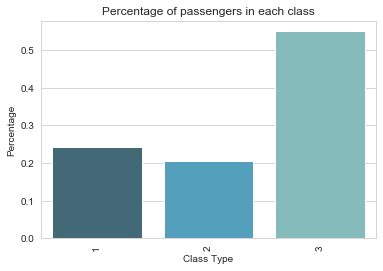

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plf = df['Pclass'].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Class Type')
plt.ylabel('Percentage')
plt.title('Percentage of passengers in each class')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the above graph, we see that almost 60 percent of passengers belonged to the third class, with first class being over 20 percent and second class being under 20 percent.

### Number of passengers per gender

Now, we'll graph the percentage of passengers per gender.

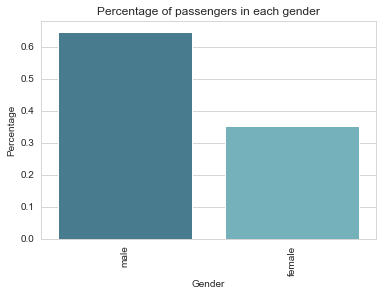

In [5]:
plf = df['Sex'].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of passengers in each gender')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the above graph, we see that, the passenger count were predominantly male, numbering close to 65 percent.

### Passengers' age with regards to their passenger class

Now, we'll use a type of graph called the kernel density estimation graph to visualize the density of the passengers' age with their respective class and compare them.

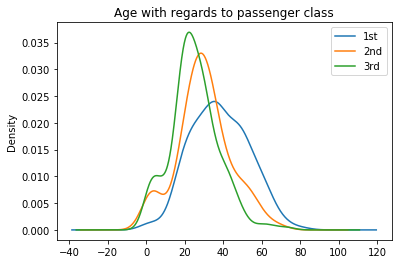

In [6]:
for x in [1,2,3]:
    df['Age'][df['Pclass'] == x].plot(kind='kde')
plt.title('Age with regards to passenger class')
plt.legend(('1st','2nd','3rd'))

plt.show()

From the graph, we can see that, the third class passengers had a younger age density compared to the first class, who had the older population. We can derive that, the younger the age, the smaller the income they had and the lower ticket prices they could manage.

### The number of survivors

Now it's time to find out the exact number of survivors in the disaster.

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

From the above, we see that only 342 people have survived the disaster. Now we'll see the graphical representation of the said data.

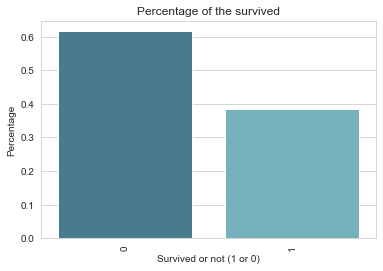

In [6]:
plf = df['Survived'].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Survived or not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of the survived')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the above graph, we can see that only 40 percent of the people survived the disaster.

### Number of survivors with regards to age

Now, we'll use a scatter graph to see the survivors rate with regards to age.

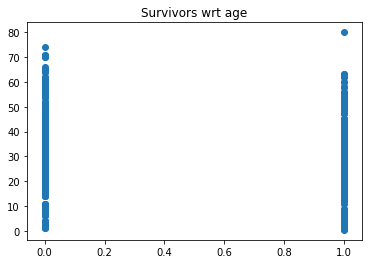

In [9]:
plt.scatter(df['Survived'], df['Age'])
plt.title('Survivors wrt age')

plt.show()

If we look at the graph, we see that some of the older population didn't survive the disaster whereas, some of the younger people, for example the kids, survived. But overall, the survival rate with regards to age is quite even.

### Number of survivors in terms of gender

Now, we'll graph the percentage of survivors in terms of gender.

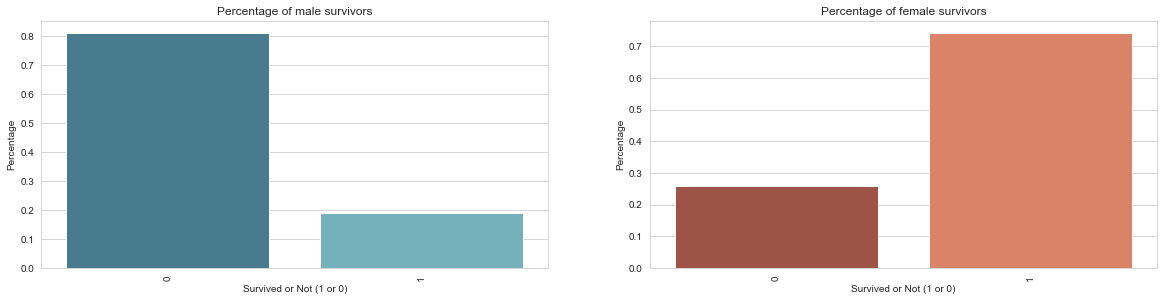

In [7]:
%matplotlib inline

sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = df['Survived'][df['Sex'] == 'male'].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of male survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df['Survived'][df['Sex'] == 'female'].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of female survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the above graph, we see that almost 80 percent of males didn't survive, which is an overwhelming amount. Contrary to the males, the females had an overwhelming survival rate, rising upto 70 percent. We can derive that, the female population were preferred to be saved and were the priority to be put into lifeboats.

### Number of survivors in terms of Passenger class

Now, let's visualize the survival rate in terms of the three passeneger classes.

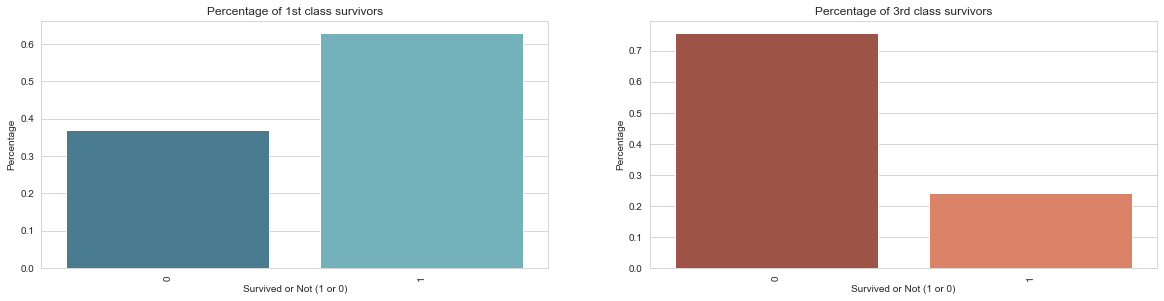

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = df['Survived'][df['Pclass'] == 1].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of 1st class survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df['Survived'][df['Pclass'] == 3].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of 3rd class survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

As seen from the above graph, about 60 percent of the first class passengers survived the disaster. Contrary to the first class passengers, the majority of the third class passengers, around 75 percent perished in the shipwreck. To summarise, the probability of survival was massively dependent on the ticket class of the passenger as the first class passengers were preferred in terms of loading up the lifeboats.

Let's summarise the entire thing with a kde graphical representation.

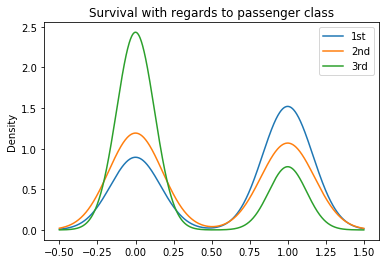

In [14]:
for x in [1,2,3]:
    df['Survived'][df['Pclass'] == x].plot(kind='kde')
plt.title('Survival with regards to passenger class')
plt.legend(('1st','2nd','3rd'))

plt.show()

### Number of survivors in terms of gender and passenger class

Now, it's time to apply multiple conditions on our dataset and graph the data. Let's use both the gender and the passenger class of a passenger to see whether what variations we get in data.

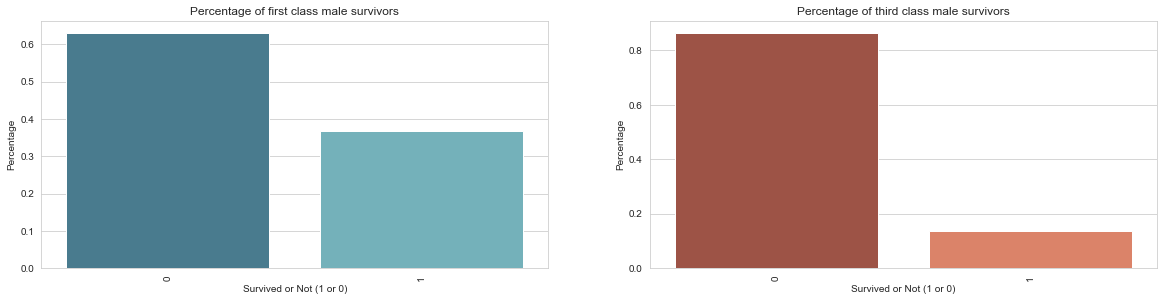

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = df['Survived'][(df['Sex'] == 'male') & (df['Pclass'] == 1)].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of first class male survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df['Survived'][(df['Sex'] == 'male') & (df['Pclass'] == 3)].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of third class male survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the graph, it can be seen that around 60 percent of the first class males didn't survive. Similar to the previous graph, the males of the third class don't survive, even though the percentage of not surviving is much higher. To summarise, the males were susceptible to not survive the disaster, regardless of their passenger class.

Now, let's focus on the female population of the Titanic.

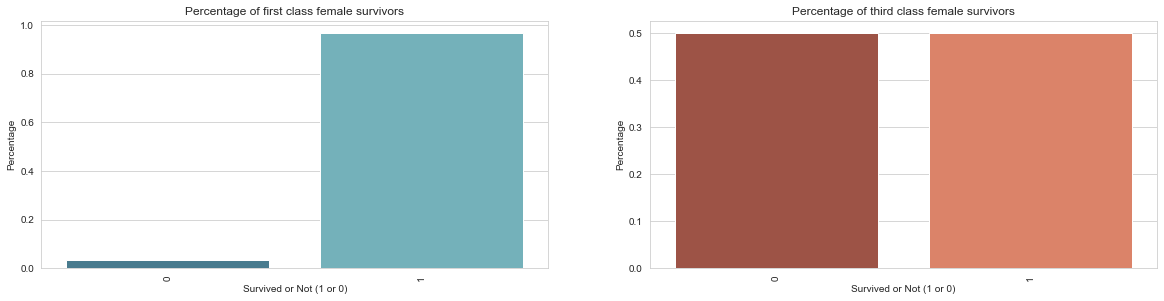

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plf = df['Survived'][(df['Sex'] == 'female') & (df['Pclass'] == 1)].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="GnBu_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of first class female survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.subplot(2,2,2)
plf = df['Survived'][(df['Sex'] == 'female') & (df['Pclass'] == 3)].value_counts(normalize=True)
plfg = sns.barplot(x=plf.index, y=plf, palette="OrRd_d")
plt.xlabel('Survived or Not (1 or 0)')
plt.ylabel('Percentage')
plt.title('Percentage of third class female survivors')
plfg.set_xticklabels(plfg.get_xticklabels(), rotation=90)

plt.show()

From the graph, we can see that almost entirely of the first class females survived the disaster. Contrary to the first class females, the survival rate of the third class female passengers is 50 percent, which is much lower. But overall, compared to the males, the female population were preferred when it came to saving. Of them, the first class females were preferred to the third class.

From all the analyses above, we can come up with certain conclusions, like the survival chances of a passenger depended on his/her gender and their ticket class. However, certain conditions like age didn't matter as much in terms of survival.

Now, since we're done with the data analysis, time to move on to the next phase, which is the construction of the machine learning models in order to predict the survival chances of a passenger.

## Constructing the prediction models

Before constructing the models, we have to take care of the columns with the missing values.

In [4]:
df = df.dropna(subset=['Age','Embarked'])

df.reset_index(drop=True, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df.shape

(712, 12)

The above dataframe now has 712 rows of passenger data after the deletion of the incomplete data.

Now, let's take a look at the datatypes for each column

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We can get rid of some unnecessary columns to reduce the dataframe memory size and then convert the remaining columns which are object by element into integer values, without which we'll be unable to construct models.

In [7]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


To convert object columns into integer values, we need to import LabelEncoder library from the sklearn.preprocessing package

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Now, we change the datatype of the two object columns

In [9]:
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)
df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7].values)

Let's recheck the datatypes now.

In [10]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

Hence, all the columns have int/float values now.

Now, that we've taken care of all the columns, let's dive in and create some machine learning models.

## Creating machine learning models for prediction

Now, we can finally use the data in the dataframe to construct models for predicting survival chances for the passengers of Titanic. First, we have to separate the input or independent values and the output or the dependent values into two separate arrays - namely X and Y.

In [11]:
X = df.iloc[:,1:8].values
Y = df.iloc[:,0].values

After this, we separate the data into training and testing values for the models. For this, we need to import train_test_split library.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Now, we need to scale all the data because raw data tend to have a wide variation. Thus, a lot of machine learning algorithms don't work without normalizing the values. Hence, we scale the values. To scale all the values, we need to import the StandardScaler library.

In [13]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.fit_transform(X_test)

We'll create a separate function which will include different types of models which will run simultenously, with which we can later compare their respective accuracies easily and determine as to which type of machine learning model will be ideal for this problem. We'll also use accuracy scores to determine the model accuracies.

In [14]:
def mlmodels(X_train, Y_train):
    
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train,Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    kn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    kn.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svl = SVC(kernel='linear', random_state=0)
    svl.fit(X_train,Y_train)
    
    from sklearn.svm import SVC
    svr = SVC(kernel='rbf', random_state=0)
    svr.fit(X_train,Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train,Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion='entropy' , random_state=0)
    dtc.fit(X_train,Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    rfc.fit(X_train,Y_train)
    
    print('[1] Logistic Regression Accuracy: ', lr.score(X_train, Y_train))
    print('[2] KNeighbors Classifier Accuracy: ', kn.score(X_train, Y_train))
    print('[3] SVC linear Regression Accuracy: ', svl.score(X_train, Y_train))
    print('[4] SVC rbf Accuracy: ', svr.score(X_train, Y_train))
    print('[5] GaussianNB Accuracy: ', gnb.score(X_train, Y_train))
    print('[6] Decision Tree Classifier Accuracy: ', dtc.score(X_train, Y_train))
    print('[7] Random Forest Classifier Accuracy: ', rfc.score(X_train, Y_train))
    
    return lr, kn, svl, svr, gnb, dtc, rfc

In [15]:
mlmodels = mlmodels(X_train, Y_train)

[1] Logistic Regression Accuracy:  0.7996485061511424
[2] KNeighbors Classifier Accuracy:  0.8523725834797891
[3] SVC linear Regression Accuracy:  0.7697715289982425
[4] SVC rbf Accuracy:  0.836555360281195
[5] GaussianNB Accuracy:  0.7820738137082601
[6] Decision Tree Classifier Accuracy:  0.9876977152899824
[7] Random Forest Classifier Accuracy:  0.9736379613356766


The function returns the accuracies of seven different models used to predict. For this particular problem, we see that the decision tree classifier algorithm has the highest accuracy among the seven. Hence, on surface level, it's evident that the decision tree classifier would be the ideal machine learning algorithm useful for this problem. However, this is only accurate for the training data.

Now, we have to determine as to what works for the testing data. For that, we use a more acute way of predicting values in confusion matrix. This allows us to look at our predicted values in depth. Hence, we import our confusion matrix function from the sklearn library.

In [16]:
from sklearn.metrics import confusion_matrix

for i in range(len(mlmodels)):
    cm = confusion_matrix(Y_test, mlmodels[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, mlmodels[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TN + FP + FN + TP)
    
    print(cm)
    print("Model [{}] Testing accuracy = {} ".format(i, test_score))
    print()

[[72  7]
 [15 49]]
Model [0] Testing accuracy = 0.8461538461538461 

[[67 12]
 [19 45]]
Model [1] Testing accuracy = 0.7832167832167832 

[[70  9]
 [17 47]]
Model [2] Testing accuracy = 0.8181818181818182 

[[77  2]
 [20 44]]
Model [3] Testing accuracy = 0.8461538461538461 

[[70  9]
 [18 46]]
Model [4] Testing accuracy = 0.8111888111888111 

[[65 14]
 [26 38]]
Model [5] Testing accuracy = 0.7202797202797203 

[[66 13]
 [16 48]]
Model [6] Testing accuracy = 0.7972027972027972 



From the above confusion matrix, we see that the accuracy levels for the testing data is quite different from the training data. Two of the most accurate algorithms (Decision Tree and Random Forest Classifier) for the training data massively underperforms for the testing data. The most accurate algorithm for the testing data happens to be the Logistic Regression and the SVC rbf model. Among these, SVC rbf model is more accurate for the training model.

All in all, if we choose to follow the model for the training data, we'll end up choosing the Decision Tree or the Random Forest Classifier. But, judging from the testing data, it's better to choose the LogisticRegression or the SVC rbf model, which seem to be the better option.